In [17]:
import nltk

In [26]:
import urllib.request
response =  urllib.request.urlopen('https://www.youtube.com/watch?v=7Vp6A0FHNL0')
html = response.read()
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)

In [27]:
tokens = [t for t in text.split()]
print(tokens)

["@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto", "Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto", "Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto", "Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto", 'Medium', "Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format('truetype');}if", '(document.fonts', '&&', 'document.fonts.load)', '{document.fonts.load("400', '10pt', 'Roboto",', '"E");document.fonts.load("500', '10pt', 'Roboto",', '"E");

In [28]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))


@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto:1
Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto:1
Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto:1
Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto:1
Medium:1
Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format('truetype');}if:1
(document.fonts:1
&&:6
document.fonts.load):1
{document.fonts.load("400:1
10pt:2
Roboto",:2
"E");document.fonts.load("500:1
"E");}var:1
ytcsi:1
=:47
{gt::1
function

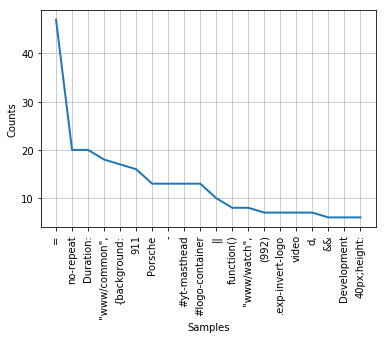

In [29]:
freq.plot(20, cumulative=False)
